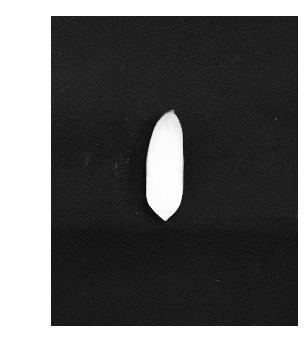

In [2]:
import radishlib as rdl

%matplotlib inline
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as pltor
from copy import copy
import cv2
from PIL import Image
import sys
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import optimize as opt
#np.set_printoptions(threshold=np.inf)

# 表示のオンオフ
IMGON = True

#使う画像名
argv=sys.argv
imgfile = argv[1]+".jpg"
imgfile = "pics/kohaku1c3kk.jpg"

#読み込み
img = cv2.imread(imgfile, cv2.IMREAD_GRAYSCALE)
# ２階調化
rdl.plotimg(img)

面積は 62458.0


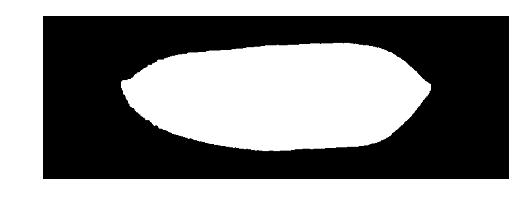

In [3]:
bw = rdl.dthreshold(img)
# 最大白領域の取り出し
bw = rdl.getBigWhite(bw)

print("面積は", rdl.countWhitePixels(bw))
#  カットと回転
# グレイ画像の場合，もしくは結果をグレー化したい場合
cutimg = rdl.cutmargin(bw, ratio=4, showline=False, color=(255,0,0),bsize=6)
daikonimg = rdl.rotateAndcut(cutimg,ratio=4)

#表示
# cv2.imshow('回転確認', daikonimg)

rdl.plotimg(daikonimg)

最大距離の画像位置(x,y) = ( 363 , 128 ),  maxR=  82.3938


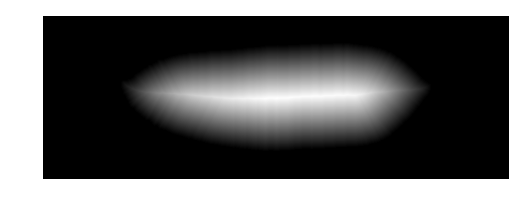

In [4]:
#キーボード入力を受け付ける
# key = cv2.waitKey(0)
'''
if key == ord('k'):            #kの処理
    daikonimg =  rdl.imagerotation(daikonimg,180, -1,-1, ratio=10)
    cv2.imwrite(argv[1]+'R.jpg',daikonimg)
    cv2.destroyAllWindows()
elif key == ord('s'):      #sの入力の処理
    cv2.imwrite(argv[1]+'R.jpg',daikonimg)
    cv2.destroyAllWindows()
'''
    
# 距離画像変換　　各白画素について，最も近い黒画素までの距離をデータとする画像を生成
dist = cv2.distanceTransform(daikonimg,cv2.DIST_L2,5)

# 最大の距離は？　　　これが最大半径となる
maxR = np.max(dist)
maxPn = np.argmax(dist)   # 2次元配列に対して argmax を取ると、1次元に並べたと仮定したときの番号が返ってくる
maxY = int(maxPn/dist.shape[1])
maxX = maxPn - maxY*dist.shape[1]
print("最大距離の画像位置(x,y) = (",maxX, ",",maxY,"),  maxR= ", maxR)

# 最大値が白（最大輝度）になるようダイナミックレンジの拡大をしてみる
distimg = ((dist/maxR)*255).astype('uint8')
rdl.plotimg(distimg)

周囲長= 1022
曲率計算のためのサンプル間距離は 10
ミディアンフィルタのサイズ 10
平滑化フィルタのサイズ 10
曲率最大の点は 337 番のサンプル点で、曲率は 0.0672007126608 座標は [121 107]
曲率最小の点は 316 番のサンプル点で、曲率は -0.00981673824353 座標は [137  97]


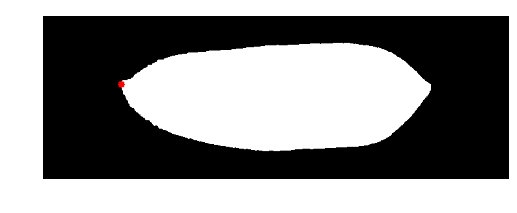

In [5]:
# 輪郭線の抽出
bw,pts = rdl.getContour(daikonimg,0)
xdata = [i[0][0]  for i in ｐｔｓ[0]]
ydata = [i[0][1]  for i in pts[0]]

# 輪郭データの重複を取り除く
pts =  []
for i in range(len(xdata)):
    if [xdata[i],ydata[i]] not in pts:
        pts.append([xdata[i],ydata[i]] )
cpts = np.array(pts)
print("周囲長=",len(cpts))

# plt.gca().set_aspect('equal',adjustable='box')
# plt.plot(cｐｔs[:,0],cpts[:,1],"r")
#rdl.plotimg(rdl.drawRadishContour(daikonimg, cpts, dotsize=10,ldotsize=10,sdotsize=10,interval=50,flag=True))

curvelength, cvs, tippoint,tipmin = rdl.curvature(cpts,samplefactor=100, mmasklen=-1,  smasklen =-1, open = False,)

pimg = cv2.merge((daikonimg,daikonimg,daikonimg))
#plt.plot(curvelength,cvs,"r")
#plt.show()
rdl.plotimg(cv2.circle(pimg,tippoint,5,(0,0,255),-1))
rdl.plotimg(cv2.circle(pimg,(886,401),5,(255,255,128),-1))

スケルトンの画素数 592.0
(121, 107)


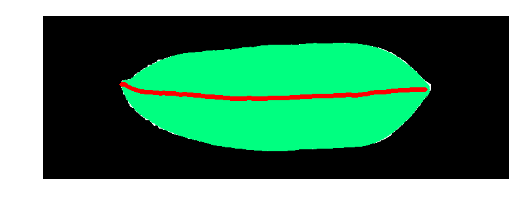

In [8]:
dist2 = copy(dist)
skel = rdl.traceRidges3(tippoint,0,dist2,phaseswitch=10)
skeldata = skel[skel[:,0].argsort()]    # この画像は大根が横向きなので，スケルトンを ｘの昇順に並べ替える
print("スケルトンの画素数",np.max(skeldata))
recallimg = rdl.skel2img2(skeldata,daikonimg)
rdl.plotimg(recallimg)
print(tippoint)

曲率計算のためのサンプル間距離は 9
ミディアンフィルタのサイズ 20
平滑化フィルタのサイズ 20
曲率最大の点は 20 番のサンプル点で、曲率は 0.00929784541234 座標は [ 150.  118.]
曲率最小の点は 289 番のサンプル点で、曲率は -0.0018376916755 座標は [ 419.  125.]


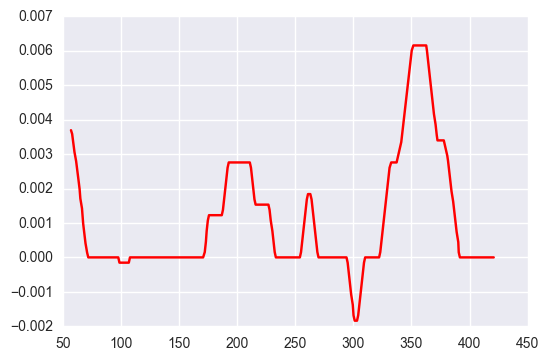

In [9]:
spts2 =  skel[:,0:2]
curvelength2, cvs2, tipmax2, tipmin2 = rdl.curvature(ｓｐｔｓ2,samplefactor=50,mmasklen=20,smasklen=20, open = True)
#samplefactor=50
xdata = curvelength2[46:-46]   #  両端
ydata = cvs2[46:-46]
plt.plot(xdata,ydata,"r")

# 最大曲率点をプロット

(150, 118)


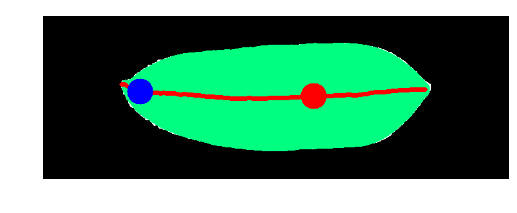

In [11]:
tmpimg = copy(recallimg)
cv2.circle(tmpimg,tipmax2,20,(255,0,0),-1)
rdl.plotimg(cv2.circle(tmpimg,tipmin2,20,(0,0,255),-1))
print(tipmax2)

最大値は 0.0061533521511
曲率の平均値= 1.64872e-03
曲率の分散= 5.65196e-06
曲率の標準偏差= 2.37739e-03
a = -0.000293231958849
b = 0.207464370992
c = 91.4520520982


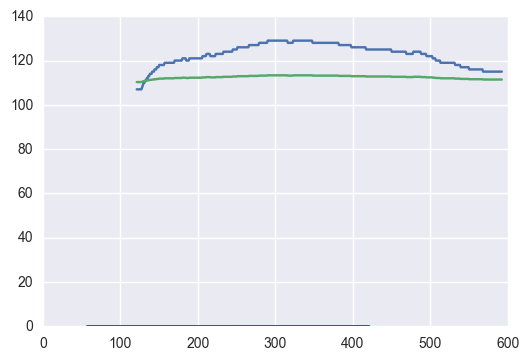

In [12]:
abcvs = np.abs(cvs2)
xdata = curvelength2[46:-46]   #  両端
ydata = abcvs[46:-46]
plt.plot(xdata,ydata,"r")
print("最大値は",np.max(ydata))

print("曲率の平均値= {:0.5e}".format(np.average(abcvs)))
print("曲率の分散= {:0.5e}".format(np.var(abcvs)))
print("曲率の標準偏差= {:0.5e}".format(np.ｓｔｄ(abcvs)))


def fit_func(x, a, b, c):
    return a * x**2 + b * x + c

res = opt.curve_fit(fit_func, spts2[:,0],spts2[:,1])

a = res[0][0]
b = res[0][1]
c = res[0][2]

print("a = %s" % (a))
print("b = %s" % (b))
print("c = %s" % (c))

Px2 = []
for x in spts2[:,1]:
    Px2.append(a * x**2 + b * x + c)

plt.plot(spts2[:,0], spts2[:,1])
plt.plot(spts2[:,0], np.array(Px2))
plt.show()